In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

Métriques chargées avec succès.
Métriques du denoiser chargées avec succès.


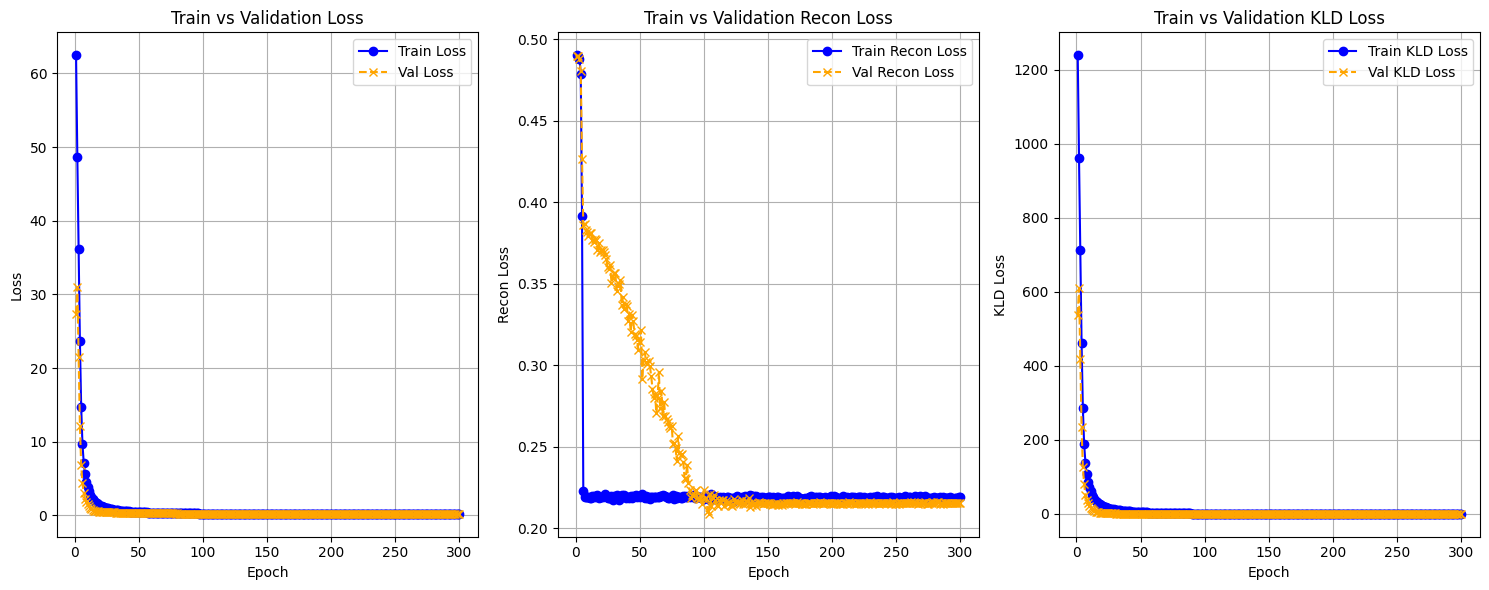

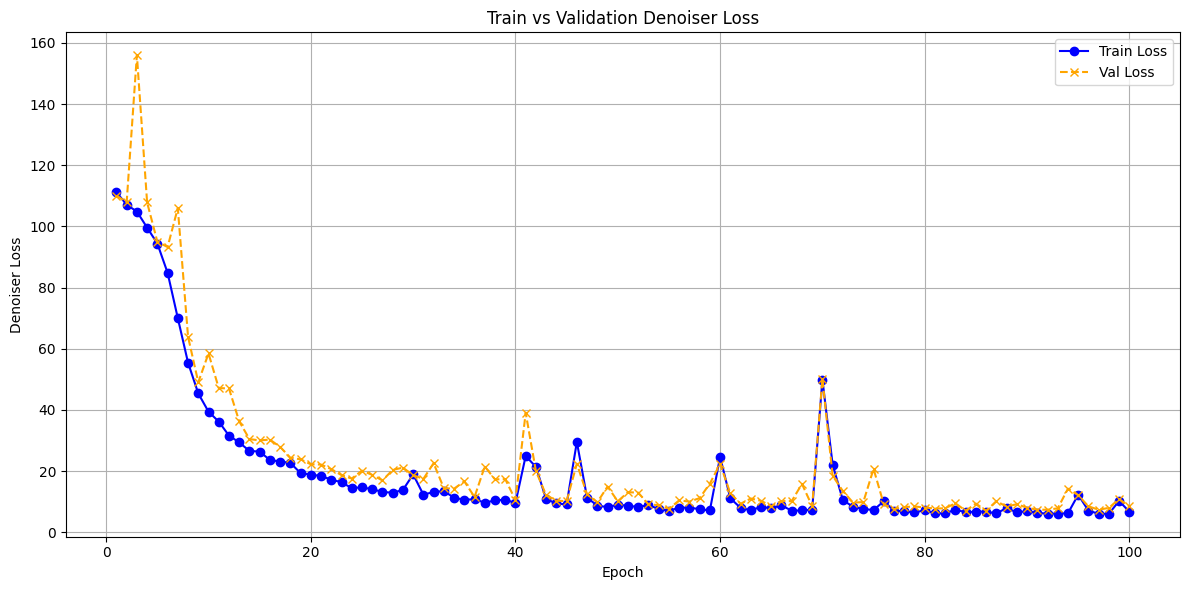

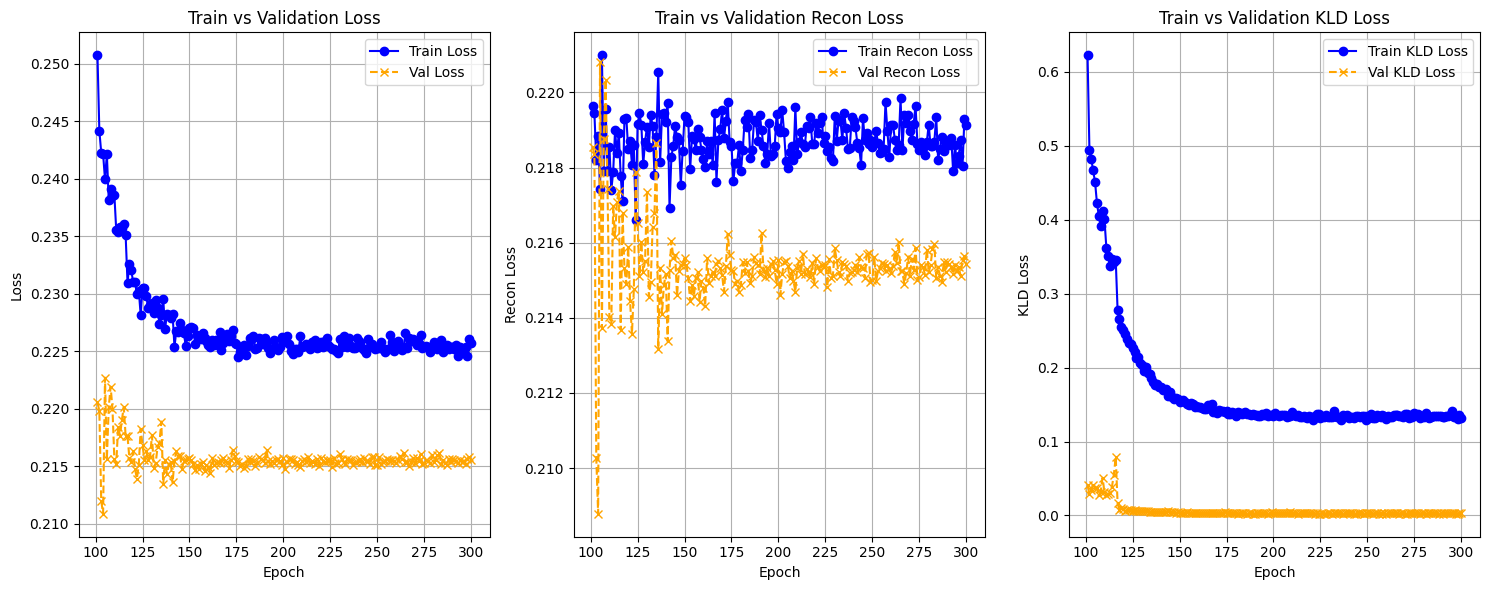

In [4]:
def load_metrics_from_folder(folder_path, save=False):
    # Vérifie si le dossier existe
    if not os.path.exists(folder_path):
        print(f"Le dossier {folder_path} n'existe pas.")
        return

    # Chargement des fichiers de métriques (CSV)
    metrics_file = os.path.join(folder_path, 'metrics.csv')
    denoiser_metrics_file = os.path.join(folder_path, 'denoiser_metrics.csv')
    
    if os.path.exists(metrics_file):
        metrics_df = pd.read_csv(metrics_file)
        print("Métriques chargées avec succès.")
    else:
        print(f"Aucun fichier {metrics_file} trouvé dans {folder_path}")
        return
    
    if os.path.exists(denoiser_metrics_file):
        denoiser_metrics_df = pd.read_csv(denoiser_metrics_file)
        print("Métriques du denoiser chargées avec succès.")
    else:
        print(f"Aucun fichier {denoiser_metrics_file} trouvé dans {folder_path}")
        return

    # Diviser les données en deux parties
    metrics_df_after_100 = metrics_df[metrics_df['Epoch'] > 100]

    if save:
        save_path_complete = os.path.join(folder_path, 'metrics_complete_plot.png')
        save_path_after_100 = os.path.join(folder_path, 'metrics_after_100_epochs_plot.png')
        save_path_denoiser = os.path.join(folder_path, 'denoiser_metrics_plot.png')
    else:
        save_path_complete = None
        save_path_after_100 = None
        save_path_denoiser = None

    # Visualisation de toutes les métriques
    plot_training_and_validation_metrics(metrics_df, save_path_complete)
    plot_denoiser_metrics(denoiser_metrics_df, save_path_denoiser)

    # Visualisation des métriques après 100 epochs
    plot_training_and_validation_metrics(metrics_df_after_100, save_path_after_100)


def plot_training_and_validation_metrics(metrics_df, save_path=None):
    """
    Affiche des graphiques pour les métriques d'entraînement et de validation, y compris la perte KLD.
    """
    plt.figure(figsize=(15, 6))

    # Sous-figure 1: Train Loss vs Validation Loss
    plt.subplot(1, 3, 1)
    if 'Train Loss' in metrics_df.columns and 'Val Loss' in metrics_df.columns:
        plt.plot(metrics_df['Epoch'], metrics_df['Train Loss'], label='Train Loss', color='blue', linestyle='-', marker='o')
        plt.plot(metrics_df['Epoch'], metrics_df['Val Loss'], label='Val Loss', color='orange', linestyle='--', marker='x')
        plt.title('Train vs Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

    # Sous-figure 2: Train Recon Loss vs Validation Recon Loss
    plt.subplot(1, 3, 2)
    if 'Train Recon Loss' in metrics_df.columns and 'Val Recon Loss' in metrics_df.columns:
        plt.plot(metrics_df['Epoch'], metrics_df['Train Recon Loss'], label='Train Recon Loss', color='blue', linestyle='-', marker='o')
        plt.plot(metrics_df['Epoch'], metrics_df['Val Recon Loss'], label='Val Recon Loss', color='orange', linestyle='--', marker='x')
        plt.title('Train vs Validation Recon Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Recon Loss')
        plt.legend()
        plt.grid(True)

    # Affichage de la KLD Loss dans un autre graphique si elle existe
    plt.subplot(1, 3, 3)
    if 'Train KLD Loss' in metrics_df.columns and 'Val KLD Loss' in metrics_df.columns:
        plt.plot(metrics_df['Epoch'], metrics_df['Train KLD Loss'], label='Train KLD Loss', color='blue', linestyle='-', marker='o')
        plt.plot(metrics_df['Epoch'], metrics_df['Val KLD Loss'], label='Val KLD Loss', color='orange', linestyle='--', marker='x')
        plt.title('Train vs Validation KLD Loss')
        plt.xlabel('Epoch')
        plt.ylabel('KLD Loss')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
    plt.show()


def plot_denoiser_metrics(denoiser_metrics_df, save_path=None):
    """
    Affiche les métriques spécifiques au denoiser sur une deuxième figure.
    """
    plt.figure(figsize=(12, 6))

    # Sous-figure 1: Denoiser Train Loss vs Denoiser Val Loss
    if 'Train Loss' in denoiser_metrics_df.columns and 'Val Loss' in denoiser_metrics_df.columns:
        plt.plot(denoiser_metrics_df['Epoch'], denoiser_metrics_df['Train Loss'], label='Train Loss', color='blue', linestyle='-', marker='o')
        plt.plot(denoiser_metrics_df['Epoch'], denoiser_metrics_df['Val Loss'], label='Val Loss', color='orange', linestyle='--', marker='x')
        plt.title('Train vs Validation Denoiser Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Denoiser Loss')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
    plt.show()


import os
from datetime import datetime

def get_last_folder():
    # Chemin de base où les dossiers sont stockés
    base_path = "../../data/trainings"

    # Liste tous les dossiers dans le répertoire de base
    folders = [f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))]

    folders.sort(key=lambda x: datetime.strptime(x.split("_")[-2] + "_" + x.split("_")[-1], "%Y-%m-%d_%H-%M-%S"))

    latest_folder = folders[-1]
    latest_folder_path = os.path.join(base_path, latest_folder)
    return latest_folder_path



# Exemple d'utilisation : Spécifie le chemin du dossier contenant les fichiers de métriques
folder_path = get_last_folder()
load_metrics_from_folder(folder_path, save=True)